In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

In [28]:
Parameter1 = pd.read_csv("Pyro Process Parameters-1.csv")
Parameter1.head()

,Unnamed: 0,LOGO,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 9.1,Unnamed: 10.1,Unnamed: 11.1,Unnamed: 12,Unnamed: 13,Unnamed: 14.1,Unnamed: 12.1,Unnamed: 13.1,Unnamed: 14.2,Unnamed: 5.2
0,7,TAG,A_431FM1_F1,B_431FM2_F1,C_431BE1_JT,D_441CN1A_1B_TT01,E_451PC1_TT01,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,...,I_441CN3_TT01,J_441CN3_TT02,K_441CN4_TT01,L_441CN4_TT02,M_441CN5_TT01,N_441CN5_TT02,L_451PC1_PT01,M_451PC1_PT03,N_461KL1_PT01,E_481FM1_FI
1,8,TAG DES,Kiln Feed,Kiln Feed,Kiln Feed BE KW,PH O/L TEMP.,Calciner Outlet Temp (TC)',BURNING ZONE TEMP,Kiln rpm,Kiln current,...,Cyn-3 Gas Temp,Cyn-3 Meterial Temp,Cyn-4 Gas Temp,Cyn-4 Meterial Temp,Cyn-5 Gas Temp,Cylone -5 Metrial Temp (TC)',Calciner Outlet Pressure,Calciner Intlet Pressure,Kiln Inlet Pressure,PC COAL TPH
2,9,UNIT,tph,tph,Kw,°C,°C,°C,rpm,A,...,°C,°C,°C,°C,°C,°C,mmWc,mmWc,mmWc,tph
3,10,06/01/2019 00:00:00,0.0,299.4,102.0,354.4,962.2,1135.5,5.0,388.0,...,598.1,594.8,782.5,806.1,916.7,1028.3,-154.2,-42.4,-42.6,10.6
4,11,06/01/2019 01:00:00,0.0,300.1,101.7,353.5,954.7,1141.8,5.0,399.5,...,597.4,594.6,766.9,805.0,898.7,1019.9,-154.1,-39.1,-48.0,10.6


In [29]:
Parameter1 = Parameter1.drop([1,2])
Parameter1 = Parameter1.iloc[:,2:]
Parameter1=Parameter1.iloc[1:,:]
Parameter1.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 14,...,Unnamed: 9.1,Unnamed: 10.1,Unnamed: 11.1,Unnamed: 12,Unnamed: 13,Unnamed: 14.1,Unnamed: 12.1,Unnamed: 13.1,Unnamed: 14.2,Unnamed: 5.2
3,0.0,299.4,102.0,354.4,962.2,1135.5,5.0,388.0,383.3,283.7,...,598.1,594.8,782.5,806.1,916.7,1028.3,-154.2,-42.4,-42.6,10.6
4,0.0,300.1,101.7,353.5,954.7,1141.8,5.0,399.5,397.7,328.2,...,597.4,594.6,766.9,805.0,898.7,1019.9,-154.1,-39.1,-48.0,10.6
5,0.0,299.6,101.8,351.7,958.6,1134.9,5.0,400.5,394.8,265.0,...,596.1,592.8,767.1,798.8,899.7,1013.5,-153.7,-37.3,-46.6,10.6
6,0.0,300.0,101.7,349.0,951.4,1123.4,5.0,398.7,396.3,299.5,...,591.9,588.4,768.0,796.1,899.0,1005.7,-156.2,-42.3,-44.4,10.6
7,0.0,299.7,101.3,348.4,950.5,1111.8,5.0,393.2,386.7,173.4,...,589.2,586.7,755.2,797.6,888.6,1003.5,-152.0,-34.0,-39.3,10.6


In [30]:
Param1_feed = pd.to_numeric(Parameter1.iloc[:,0]) + pd.to_numeric(Parameter1.iloc[:,1]) #Adding Both the kiln feed column
for i in range(0,len(Parameter1)):
    Parameter1.iloc[i,:] = pd.to_numeric(Parameter1.iloc[i,:])
Parameter1.iloc[:,1] = Param1_feed
Parameter1 = Parameter1.drop(['Unnamed: 1'], axis=1) #Removing the first Kiln feed. After updating it with added values
Parameter1.head()

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 14,Unnamed: 3.1,...,Unnamed: 9.1,Unnamed: 10.1,Unnamed: 11.1,Unnamed: 12,Unnamed: 13,Unnamed: 14.1,Unnamed: 12.1,Unnamed: 13.1,Unnamed: 14.2,Unnamed: 5.2
3,299.4,102,354.4,962.2,1135.5,5,388,383.3,283.7,341,...,598.1,594.8,782.5,806.1,916.7,1028.3,-154.2,-42.4,-42.6,10.6
4,300.1,101.7,353.5,954.7,1141.8,5,399.5,397.7,328.2,342.8,...,597.4,594.6,766.9,805,898.7,1019.9,-154.1,-39.1,-48,10.6
5,299.6,101.8,351.7,958.6,1134.9,5,400.5,394.8,265,336.2,...,596.1,592.8,767.1,798.8,899.7,1013.5,-153.7,-37.3,-46.6,10.6
6,300.0,101.7,349,951.4,1123.4,5,398.7,396.3,299.5,331.6,...,591.9,588.4,768,796.1,899,1005.7,-156.2,-42.3,-44.4,10.6
7,299.7,101.3,348.4,950.5,1111.8,5,393.2,386.7,173.4,333.6,...,589.2,586.7,755.2,797.6,888.6,1003.5,-152,-34,-39.3,10.6


Total number of data points taken 6644


In [31]:
Parameter1=Parameter1.dropna()

In [32]:
Parameter1_numpy = Parameter1.iloc[:,:].to_numpy()
means = np.mean(Parameter1_numpy, axis=0)
Parameter1_numpy
print("Total number of data points taken "  + str(len(Parameter1.iloc[:,1])))

Total number of data points taken 6378


In [33]:
STDs = []                                                  #List of standard deviation

#Total 25 columns left
Bad_value_index = set()      #This will store the Gaussian anomalous indexes row-wise
for j in range(0,24):
    Parameter1_std = Parameter1.iloc[:,j]
    STDs.append(np.std(Parameter1_std, axis=0))             #Calculate the standard deviation of respective column
    if True:
        for i in range(0, len(Parameter1.iloc[:,1])):
            if i in Bad_value_index:
                continue
            else:
                if abs(Parameter1_numpy[i][j] - means[j]) > 2*STDs[j]: #or  abs(Parameter2_numpy[i][13] - means[13]) > 2*stds:
                    Bad_value_index.add(i)

In [34]:
Bad_values = list(Bad_value_index)
Bad_values.sort()
print("There are " + str(len(Bad_values)) + " rows with differnet from others. In other words they are statistically anomalous");
print("The index of these rows are stored in list Bad_values.")

There are 1224 rows with differnet from others. In other words they are statistically anomalous
The index of these rows are stored in list Bad_values.


In [35]:
Anomalious = pd.read_csv("Pyro Process Parameters-1.csv")
#Anomalious = Anomalious.drop(['L_SPC_COOLING_AIR'], axis=1)  #Removing SP Cooler air, as it is all zero
# Anomalious = Anomalious.drop(['I_Kiln RPM'], axis=1)         #Removing Kiln RPM, too much bias
Anomalious = Anomalious.drop(['Unnamed: 1'], axis=1) #Removing the first Kiln feed

Anomalious.head()

,Unnamed: 0,LOGO,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 9.1,Unnamed: 10.1,Unnamed: 11.1,Unnamed: 12,Unnamed: 13,Unnamed: 14.1,Unnamed: 12.1,Unnamed: 13.1,Unnamed: 14.2,Unnamed: 5.2
0,7,TAG,B_431FM2_F1,C_431BE1_JT,D_441CN1A_1B_TT01,E_451PC1_TT01,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,K_461KL1_JZ_EM,...,I_441CN3_TT01,J_441CN3_TT02,K_441CN4_TT01,L_441CN4_TT02,M_441CN5_TT01,N_441CN5_TT02,L_451PC1_PT01,M_451PC1_PT03,N_461KL1_PT01,E_481FM1_FI
1,8,TAG DES,Kiln Feed,Kiln Feed BE KW,PH O/L TEMP.,Calciner Outlet Temp (TC)',BURNING ZONE TEMP,Kiln rpm,Kiln current,kiln M.DRIVE POWER,...,Cyn-3 Gas Temp,Cyn-3 Meterial Temp,Cyn-4 Gas Temp,Cyn-4 Meterial Temp,Cyn-5 Gas Temp,Cylone -5 Metrial Temp (TC)',Calciner Outlet Pressure,Calciner Intlet Pressure,Kiln Inlet Pressure,PC COAL TPH
2,9,UNIT,tph,Kw,°C,°C,°C,rpm,A,Kw,...,°C,°C,°C,°C,°C,°C,mmWc,mmWc,mmWc,tph
3,10,06/01/2019 00:00:00,299.4,102.0,354.4,962.2,1135.5,5.0,388.0,383.3,...,598.1,594.8,782.5,806.1,916.7,1028.3,-154.2,-42.4,-42.6,10.6
4,11,06/01/2019 01:00:00,300.1,101.7,353.5,954.7,1141.8,5.0,399.5,397.7,...,597.4,594.6,766.9,805.0,898.7,1019.9,-154.1,-39.1,-48.0,10.6


In [36]:
#Unnamed = list(Anomalious.iloc[2:,0])
dateTime = list(Anomalious.iloc[3:,1])
end = len(Anomalious.iloc[:,1])
End = []
for i in range(2+len(Bad_values),end):
    End.append(i)
Anomalious = Anomalious.drop(End)
Anomalious.head()

,Unnamed: 0,LOGO,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 9.1,Unnamed: 10.1,Unnamed: 11.1,Unnamed: 12,Unnamed: 13,Unnamed: 14.1,Unnamed: 12.1,Unnamed: 13.1,Unnamed: 14.2,Unnamed: 5.2
0,7,TAG,B_431FM2_F1,C_431BE1_JT,D_441CN1A_1B_TT01,E_451PC1_TT01,H_461KL1_PYRO_MTR,I_Kiln RPM,J_461KL1_IZ,K_461KL1_JZ_EM,...,I_441CN3_TT01,J_441CN3_TT02,K_441CN4_TT01,L_441CN4_TT02,M_441CN5_TT01,N_441CN5_TT02,L_451PC1_PT01,M_451PC1_PT03,N_461KL1_PT01,E_481FM1_FI
1,8,TAG DES,Kiln Feed,Kiln Feed BE KW,PH O/L TEMP.,Calciner Outlet Temp (TC)',BURNING ZONE TEMP,Kiln rpm,Kiln current,kiln M.DRIVE POWER,...,Cyn-3 Gas Temp,Cyn-3 Meterial Temp,Cyn-4 Gas Temp,Cyn-4 Meterial Temp,Cyn-5 Gas Temp,Cylone -5 Metrial Temp (TC)',Calciner Outlet Pressure,Calciner Intlet Pressure,Kiln Inlet Pressure,PC COAL TPH
2,9,UNIT,tph,Kw,°C,°C,°C,rpm,A,Kw,...,°C,°C,°C,°C,°C,°C,mmWc,mmWc,mmWc,tph
3,10,06/01/2019 00:00:00,299.4,102.0,354.4,962.2,1135.5,5.0,388.0,383.3,...,598.1,594.8,782.5,806.1,916.7,1028.3,-154.2,-42.4,-42.6,10.6
4,11,06/01/2019 01:00:00,300.1,101.7,353.5,954.7,1141.8,5.0,399.5,397.7,...,597.4,594.6,766.9,805.0,898.7,1019.9,-154.1,-39.1,-48.0,10.6


In [37]:
for i in range(len(Bad_values)):
    temp = Bad_values[i]
    Anomalious.iloc[2+i,1] = dateTime[temp]
    Anomalious.iloc[2+i,2:27] = Parameter1.iloc[temp,:]
Anomalious.to_csv("Anomaliousdata-Parameter1.csv")

In [38]:
Parameter1 = Parameter1.drop(Bad_values)
print(len(Parameter1.iloc[:,1]))
Parameter1.to_csv("Gaussian_Anomalous_Parameter1.csv")

5154


In [39]:
Parameter1

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 14,Unnamed: 3.1,...,Unnamed: 9.1,Unnamed: 10.1,Unnamed: 11.1,Unnamed: 12,Unnamed: 13,Unnamed: 14.1,Unnamed: 12.1,Unnamed: 13.1,Unnamed: 14.2,Unnamed: 5.2
3,299.4,102,354.4,962.2,1135.5,5,388,383.3,283.7,341,...,598.1,594.8,782.5,806.1,916.7,1028.3,-154.2,-42.4,-42.6,10.6
4,300.1,101.7,353.5,954.7,1141.8,5,399.5,397.7,328.2,342.8,...,597.4,594.6,766.9,805,898.7,1019.9,-154.1,-39.1,-48,10.6
5,299.6,101.8,351.7,958.6,1134.9,5,400.5,394.8,265,336.2,...,596.1,592.8,767.1,798.8,899.7,1013.5,-153.7,-37.3,-46.6,10.6
6,300.0,101.7,349,951.4,1123.4,5,398.7,396.3,299.5,331.6,...,591.9,588.4,768,796.1,899,1005.7,-156.2,-42.3,-44.4,10.6
8,299.7,101.9,347.7,952.3,1092.4,5,391.6,385.8,322.4,337.2,...,589.1,586.5,752.5,799.6,883.3,1016.6,-162,-38.5,-50.6,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6374,270.8,103,336.2,948.6,1299.7,4.5,413.9,379.6,612.3,339.8,...,620.7,624.7,809.9,799.6,921.5,62,-125.6,-19.7,-30.5,10.3
6375,274.1,104.3,335.3,941.2,1358.4,4.7,389.1,365,640,334.6,...,616.4,622.4,814.7,796.4,941.7,815.1,-126.5,-31.4,-30.5,10.4
6378,274.0,103.8,335.3,938.9,1361.7,4.8,372.8,348.1,680.6,332.6,...,616.5,621.7,803.2,795.1,913.4,1048.5,-120.1,-33.6,-14,10.3
6381,194.0,72.2,261.6,695.5,959.7,3.1,286.2,251.2,347.4,266.7,...,459.3,459.9,580,581.3,675.1,728.6,-131.8,-34.7,-30.7,7


In [40]:
trainin = Parameter1.iloc[1000:, :] 
trainoutlet = Parameter1.iloc[1000:, :] 
validatein = Parameter1.iloc[0:1000, :]
validateoutlet = Parameter1.iloc[0:1000,:]
trainin = trainin.to_numpy()
trainoutlet = trainoutlet.to_numpy()
validatein = validatein.to_numpy()
validateoutlet = validateoutlet.to_numpy()
print(trainin)
print(trainoutlet)

[[275.0 97.9 351.7 ... -28.9 -30.8 10.3]
 [263.6 95.4 357.4 ... -32.5 -21.0 9.7]
 [259.1 94.2 359.4 ... -30.6 -43.9 9.8]
 ...
 [274.0 103.8 335.3 ... -33.6 -14.0 10.3]
 [194.0 72.2 261.6 ... -34.7 -30.7 7.0]
 [623.0 109.5 565.5 ... -31.7 -6.5 14.5]]
[[275.0 97.9 351.7 ... -28.9 -30.8 10.3]
 [263.6 95.4 357.4 ... -32.5 -21.0 9.7]
 [259.1 94.2 359.4 ... -30.6 -43.9 9.8]
 ...
 [274.0 103.8 335.3 ... -33.6 -14.0 10.3]
 [194.0 72.2 261.6 ... -34.7 -30.7 7.0]
 [623.0 109.5 565.5 ... -31.7 -6.5 14.5]]


In [41]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
normalizetrain_in = Normalization(axis=-1)
normalizetrain_outlet = Normalization(axis=-1)
normalizevalidate_in = Normalization(axis=-1)
normalizevalidate_outlet = Normalization(axis=-1)
trainin = trainin.astype(np.float32)
trainoutlet = trainoutlet.astype(np.float32)
validatein = validatein.astype(np.float32)
validateoutlet = validateoutlet.astype(np.float32)
normalizetrain_in.adapt(trainin)
normalizetrain_outlet.adapt(trainoutlet)
normalizevalidate_in.adapt(validatein)
normalizevalidate_outlet.adapt(validateoutlet)
trainin_normalize = normalizetrain_in(trainin)
trainoutlet_normalize = normalizetrain_outlet(trainoutlet)
validatein_normalize = normalizevalidate_in(validatein)
validateoutlet_normalize = normalizevalidate_outlet(validateoutlet)
print(validatein_normalize)

tf.Tensor(
[[ 1.4355131   1.126607    0.01838012 ... -1.2814679  -0.727499
   0.45234886]
 [ 1.4677695   1.07267    -0.04877985 ... -0.8607205  -1.2515432
   0.45234886]
 [ 1.4447297   1.0906498  -0.18309978 ... -0.63122225 -1.1156797
   0.45234886]
 ...
 [ 0.12224042  0.29958093  0.04822874 ...  0.3505206   0.26236153
   0.1928998 ]
 [ 0.29273602  0.40745366 -0.19802523 ...  0.15927197  0.8252237
   0.5820731 ]
 [ 0.30655938  0.4254322  -0.08609119 ... -0.12122589  0.6699514
   0.38748643]], shape=(1000, 25), dtype=float32)


In [42]:
layerin = keras.Input(shape=(25,))
x = keras.layers.Dense(30,activation="relu",activity_regularizer=regularizers.l1(0.008))(layerin)
x = keras.layers.Dense(20,activation="relu",activity_regularizer=regularizers.l1(0.008))(x)
x = keras.layers.Dense(10,activation="relu",activity_regularizer=regularizers.l1(0.008))(x)
x = keras.layers.Dense(20,activation="relu",activity_regularizer=regularizers.l1(0.008))(x)
x = keras.layers.Dense(30,activation="relu",activity_regularizer=regularizers.l1(0.008))(x)
x = keras.layers.Dense(25)(x)
model = keras.Model(inputs=layerin,outputs=x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 25)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)                780       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_9 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_10 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_11 (Dense)             (None, 25)                775 

In [43]:
model.compile(optimizer="adam",loss="mean_squared_error")
validation_set = tf.data.Dataset.from_tensor_slices((validatein,validateoutlet))
history = model.fit(trainin_normalize,trainoutlet_normalize,batch_size=40,epochs=100,validation_data=(validatein_normalize,validateoutlet_normalize))

Train on 4154 samples, validate on 1000 samples
Epoch 1/100
4154/4154 [==============================] - 2s 382us/sample - loss: 1.0835 - val_loss: 1.0453
Epoch 2/100
4154/4154 [==============================] - 0s 98us/sample - loss: 0.9076 - val_loss: 0.8395
Epoch 3/100
4154/4154 [==============================] - 0s 75us/sample - loss: 0.7741 - val_loss: 0.8037
Epoch 4/100
4154/4154 [==============================] - 0s 76us/sample - loss: 0.7189 - val_loss: 0.7736
Epoch 5/100
4154/4154 [==============================] - 0s 73us/sample - loss: 0.6838 - val_loss: 0.7600
Epoch 6/100
4154/4154 [==============================] - 0s 73us/sample - loss: 0.6509 - val_loss: 0.7383
Epoch 7/100
4154/4154 [==============================] - 0s 74us/sample - loss: 0.6234 - val_loss: 0.7212
Epoch 8/100
4154/4154 [==============================] - 0s 78us/sample - loss: 0.5998 - val_loss: 0.6977
Epoch 9/100
4154/4154 [==============================] - 0s 75us/sample - loss: 0.5698 - val_loss: 0.64

4154/4154 [==============================] - 0s 73us/sample - loss: 0.3056 - val_loss: 0.4668
Epoch 78/100
4154/4154 [==============================] - 0s 73us/sample - loss: 0.3025 - val_loss: 0.4628
Epoch 79/100
4154/4154 [==============================] - 0s 73us/sample - loss: 0.3003 - val_loss: 0.4611
Epoch 80/100
4154/4154 [==============================] - 0s 74us/sample - loss: 0.2982 - val_loss: 0.4556
Epoch 81/100
4154/4154 [==============================] - 0s 78us/sample - loss: 0.2958 - val_loss: 0.4546
Epoch 82/100
4154/4154 [==============================] - 0s 76us/sample - loss: 0.2944 - val_loss: 0.4547
Epoch 83/100
4154/4154 [==============================] - 0s 78us/sample - loss: 0.2921 - val_loss: 0.4522
Epoch 84/100
4154/4154 [==============================] - 0s 74us/sample - loss: 0.2904 - val_loss: 0.4511
Epoch 85/100
4154/4154 [==============================] - 0s 74us/sample - loss: 0.3061 - val_loss: 0.4501
Epoch 86/100
4154/4154 [==========================

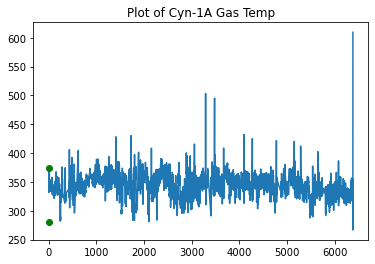

In [44]:
import matplotlib.pyplot as plt
#Plotting Tertiary Air Temperature with a TAG of F_451PC1_TT04 in Parameter2, and column no. of 10 in Parameter-2
# print(Parameter2.loc[:,'F_451PC1_TT04'])
plt.plot(Parameter1.loc[:,'Unnamed: 3.1'])
plt.title('Plot of Cyn-1A Gas Temp')
index = 10
Max = STDs[index] + means[index]
Min = means[index] - STDs[index]
plt.plot(Min,"go")
plt.plot(Max,"go")

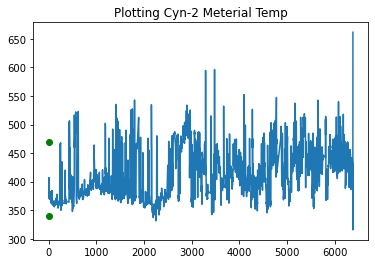

In [45]:
#Plotting Kiln I/L Temp with a TAG of G_461KL1_TT01 in Parmeter2, and column no. of 11 in Parameter-2
plt.plot(Parameter1.loc[:,'Unnamed: 8.1'])
plt.title('Plotting Cyn-2 Meterial Temp')
index = 14
Max = STDs[index] + means[index]
Min = means[index] - STDs[index]
plt.plot(Min,"go")
plt.plot(Max,"go")

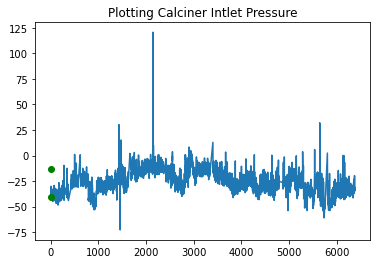

In [46]:
plt.plot(Parameter1.loc[:,'Unnamed: 13.1'])
plt.title('Plotting Calciner Intlet Pressure')
index = 23
Max = STDs[index] + means[index]
Min = means[index] - STDs[index]
plt.plot(Min,"go")
plt.plot(Max,"go")

In [53]:
Parameter1_test = pd.read_csv("Pyro Process Parameters-1.csv")
Parameter1_test = Parameter1_test.drop([0,1])
Parameter1_test = Parameter1_test.iloc[:,2:]
Parameter1_test=Parameter1_test.iloc[1:,:]
Param1_feed_test = pd.to_numeric(Parameter1_test.iloc[:,0]) + pd.to_numeric(Parameter1_test.iloc[:,1])
for i in range(0,len(Parameter1_test)):
    Parameter1_test.iloc[i,:] = pd.to_numeric(Parameter1_test.iloc[i,:])
Parameter1_test.iloc[:,1] = Param1_feed_test
#Parameter1_test = Parameter1_test.drop(['A_431FM1_FI'], axis=1) #Removing the first Kiln feed
# Parameter2_test = Parameter2_test.iloc[:,1:]
Parameter1_test = Parameter1_test.drop(['Unnamed: 1'], axis=1) 
Parameter1_test=Parameter1_test.dropna()
Parameter1_test = Parameter1_test.to_numpy()
# # Parameter2_test

In [54]:
normalizer_test = Normalization(axis=-1)
normalizer_test.adapt(Parameter1_test)
Parameter1_test = Parameter1_test.astype(np.float32)
Param1_test = normalizer_test(Parameter1_test)
print(Param1_test)

tf.Tensor(
[[ 1.3550045   0.5966134   0.45159167 ... -1.4539567  -1.1561967
   0.39758986]
 [ 1.3822433   0.5546842   0.43105525 ... -1.1690109  -1.556249
   0.39758986]
 [ 1.3627874   0.56866133  0.3899824  ... -1.0135862  -1.4525317
   0.39758986]
 ...
 [ 0.36664653  0.84818614  0.01576007 ... -0.6941018   0.9625986
   0.2853536 ]
 [-2.746293   -3.5683072  -1.6659557  ... -0.78908384 -0.27460015
  -0.9492445 ]
 [13.946845    1.6448315   5.268556   ... -0.53004247  1.5182269
   1.8566601 ]], shape=(6378, 25), dtype=float32)


In [55]:
Parameter1_input = model.predict(Param1_test)
diff = Parameter1_input - Param1_test
loss_model = []
for i in range(0,len(diff)):
    diff_process = 0
    for j in range(24):
        diff_process = diff_process+diff[i,j]
    loss_model.append(diff_process)
print(len(loss_model))

6378


Text(0.5, 1.0, 'Model Loss')

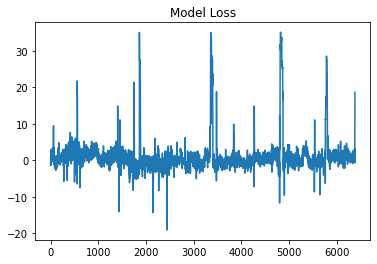

In [56]:
plt.plot(loss_model)
plt.title('Model Loss')

In [57]:
anomalyModel = []
for i in range(0,len(loss_model)):
    if loss_model[i] > 5 or loss_model[i] < -5:
        anomalyModel.append(i)

anomalyStatus = []
for a in anomalyModel:
    if a in Bad_values:
        anomalyStatus.append("True, anomaly")
    else:
        anomalyStatus.append("False, anomaly")
print("By using 2X(standard deviation) there are %d anomalous cases." %(len(Bad_values)))
print("Out of %d test examples, the model thinks that %d are anomalous.\n" %(6378, len(anomalyModel)))
print("Out of 6374 test examples, the model truly detected anomaly on " + str(anomalyStatus.count("True, anomaly")) + " cases." + " TRUE POSITIVE(Anomalous)")
print("Out of 6374 test examples, the model falsly detected anomaly on " + str(anomalyStatus.count("False, anomaly")) + " cases." + "FALSE POSITIVE(Anomalous)")
print("Out of 6374 test examples, the model falsly detected normalcy on %d-%d = %d cases. FALSE NEGATIVE(normalcy)" %(len(Bad_values), len(anomalyModel), len(Bad_values) - len(anomalyModel)))

By using 2X(standard deviation) there are 1224 anomalous cases.
Out of 6378 test examples, the model thinks that 282 are anomalous.

Out of 6374 test examples, the model truly detected anomaly on 274 cases. TRUE POSITIVE(Anomalous)
Out of 6374 test examples, the model falsly detected anomaly on 8 cases.FALSE POSITIVE(Anomalous)
Out of 6374 test examples, the model falsly detected normalcy on 1224-282 = 942 cases. FALSE NEGATIVE(normalcy)
